In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)
root_dir = "/content/drive/My Drive/SolucionAire/"
print(root_dir)

Mounted at /content/drive
/content/drive/My Drive/SolucionAire/


In [3]:
df = pd.read_excel(root_dir + 'data2.xlsx')
df.head()

,db,150,125,100,75,50,25,10
0,1,0.029700,0.020000,0.014000,0.008200,0.003100,0.001000,0.000400
1,2,0.071685,0.050627,0.036956,0.023158,0.009978,0.003780,0.001687
2,3,0.120025,0.087162,0.065206,0.042506,0.019771,0.008229,0.003916
3,4,0.173020,0.128153,0.097556,0.065400,0.032117,0.014291,0.007117
4,5,0.229767,0.172814,0.133342,0.091355,0.046792,0.021927,0.011312


In [4]:
df2 = pd.melt(df, id_vars=['db'], var_name='PSI', value_name='CFM')
df2.head()

,db,PSI,CFM
0,1,150,0.029700
1,2,150,0.071685
2,3,150,0.120025
3,4,150,0.173020
4,5,150,0.229767


In [5]:
dbs = df2['db'].values
psi = df2['PSI'].values
cfm = df2['CFM'].values

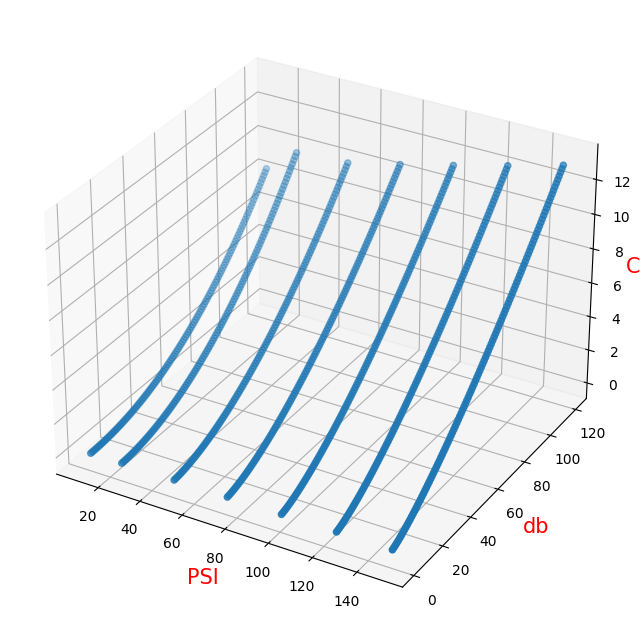

In [7]:
# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos en 3D
ax.scatter(psi, dbs, cfm, marker='o')

# Etiquetas de los ejes
ax.set_xlabel('PSI', color = 'r', size = 15)
ax.set_ylabel('db', color = 'r', size = 15)
ax.set_zlabel('CFM', color = 'r', size = 15)

# Mostrar el gráfico
plt.show()

# Modelo

## Regresion Lineal

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [6]:
# Obtener las características (X -> db,  PSI) y la variable objetivo (Y -> CFM)
X = df2[['db', 'PSI']]
y = df2['CFM']

In [9]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula el R^2
r2 = r2_score(y_test, y_pred)

print(f'R^2: {r2}')

R^2: 0.9600587605755269


In [13]:
X_test.iloc[0]

db     96
PSI    25
Name: 695, dtype: object

In [15]:
model.predict(np.array([[96, 25]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.52233209])

In [16]:
model.predict(np.array([[16.7, 30]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-0.67630535])

## DT

In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
# Realiza predicciones en el conjunto de prueba
y_pred_dt = dt.predict(X_test)

# Calcula el R^2
r2 = r2_score(y_test, y_pred_dt)

print(f'R^2: {r2}')

R^2: 0.9982926379111176


In [20]:
X_test.head()

,db,PSI
695,96,25
816,97,10
30,31,150
599,120,50
96,97,150


In [21]:
y_test.head()

695    6.353124
816    5.343062
30     2.336552
599    9.951782
96     9.961866
Name: CFM, dtype: float64

In [22]:
X_train.shape

(672, 2)

In [23]:
X_test.iloc[0]

db     96
PSI    25
Name: 695, dtype: object

In [24]:
dt.predict(np.array([[96, 25]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([6.48069484])

In [25]:
dt.predict(np.array([[16.7, 30]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([0.22941207])

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [33]:
# Realiza predicciones en el conjunto de prueba
y_pred_rfr = rfr.predict(X_test)

# Calcula el R^2
r2 = r2_score(y_test, y_pred_rfr)

print(f'R^2: {r2}')

R^2: 0.999176624072323


In [34]:
rfr.predict(np.array([[96, 25]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.42723595])

In [39]:
rfr.predict(np.array([[17, 25]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.23177587])

In [11]:
import pickle

In [199]:
with open('/content/drive/My Drive/SolucionAire/Modelos/RFR.pkl', 'wb') as file:
    pickle.dump(rfr, file)

## SVR - Support Vector Regression

In [40]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [41]:
# Realiza predicciones en el conjunto de prueba
y_pred_svr = svr.predict(X_test)

# Calcula el R^2
r2 = r2_score(y_test, y_pred_svr)

print(f'R^2: {r2}')

R^2: 0.9986786087751881


In [42]:
svr.predict(np.array([[96, 25]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([6.24900169])

In [43]:
svr.predict(np.array([[16.7, 30]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([0.14489346])

## Bayesian Ridge Regression

In [44]:
from sklearn import linear_model
bay = linear_model.BayesianRidge()
bay.fit(X_train, y_train)

BayesianRidge()

In [45]:
# Realiza predicciones en el conjunto de prueba
y_pred_bay = bay.predict(X_test)

# Calcula el R^2
r2 = r2_score(y_test, y_pred_bay)

print(f'R^2: {r2}')

R^2: 0.9600570767174731


In [46]:
bay.predict(np.array([[96, 25]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


array([6.52196004])

In [47]:
bay.predict(np.array([[16.7, 30]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BayesianRidge was fitted with feature names
  warnings.warn(


array([-0.67569923])

## xgboost - eXtra Gradient Boosting Regression

In [50]:
# check xgboost version
import xgboost as xg
print(xgboost.__version__)

2.0.3


In [59]:
# Instantiation
xgb_r = xg.XGBRegressor(seed = 123)

# Fitting the model
xgb_r.fit(X_train.values, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
# Realiza predicciones en el conjunto de prueba
y_pred_xgb_r = xgb_r.predict(X_test.values)

# Calcula el R^2
r2 = r2_score(y_test, y_pred_xgb_r)

print(f'R^2: {r2}')

R^2: 0.9991093264712305


In [62]:
xgb_r.predict(np.array([[96, 25]]))

array([6.4589825], dtype=float32)

In [63]:
xgb_r.predict(np.array([[16.7, 30]]))

array([0.23585983], dtype=float32)

In [200]:
with open('/content/drive/My Drive/SolucionAire/Modelos/xgb.pkl', 'wb') as file:
    pickle.dump(xgb_r, file)

## Red Neuronal propia - TensorFlow

In [65]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import load_model, Model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [146]:
def get_rnn():

  # Capa de entrada con dos nodos (dos valores de entrada)
  input_layer = Input(shape=(2,))

  # Capas ocultas (puedes ajustar la cantidad de nodos según tu problema)
  d1 = Dense(units=256, activation='relu')(input_layer)
  d2 = Dense(units=128, activation='relu')(d1)
  d3 = Dense(units=64, activation='relu')(d2)
  d4 = Dense(units=32, activation='relu')(d3)

  # Capa de salida con un nodo (un valor de salida para la regresión)
  output_layer = Dense(units=1, activation='linear')(d4)

  model = Model(inputs=input_layer, outputs=output_layer)

  return model

In [154]:
rnn = get_rnn()

model_id = 'RNN'
model_path = '/content/drive/My Drive/SolucionAire/Modelos/{}.h5'.format(model_id)

earlystopper = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1
)

model_checkpoint = ModelCheckpoint(
    model_path,
    monitor='val_loss',
    verbose=1,
    save_best_only=True
)

In [155]:
# Compilar el modelo
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [156]:
# Resumen del modelo
rnn.summary()

Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_73 (Dense)            (None, 256)               768       
                                                                 
 dense_74 (Dense)            (None, 128)               32896     
                                                                 
 dense_75 (Dense)            (None, 64)                8256      
                                                                 
 dense_76 (Dense)            (None, 32)                2080      
                                                                 
 dense_77 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44033 (172.00 KB)
Trainable params: 44033 (1

In [79]:
# Convertir NumPy arrays a tensores
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [157]:
history = rnn.fit(X_train_tensor, y_train_tensor, validation_data=(X_test_tensor, y_test_tensor), epochs=60, batch_size=4, callbacks=[model_checkpoint, earlystopper])

Epoch 1/60
165/168 [============================>.] - ETA: 0s - loss: 2.7430 - mae: 1.2281
Epoch 1: val_loss improved from inf to 1.04699, saving model to /content/drive/My Drive/SolucionAire/RNN/RNN.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


168/168 [==============================] - 3s 6ms/step - loss: 2.7269 - mae: 1.2275 - val_loss: 1.0470 - val_mae: 0.8466
Epoch 2/60
149/168 [=========================>....] - ETA: 0s - loss: 1.1903 - mae: 0.8951
Epoch 2: val_loss improved from 1.04699 to 1.02920, saving model to /content/drive/My Drive/SolucionAire/RNN/RNN.h5
168/168 [==============================] - 1s 4ms/step - loss: 1.2036 - mae: 0.9000 - val_loss: 1.0292 - val_mae: 0.8700
Epoch 3/60
148/168 [=========================>....] - ETA: 0s - loss: 1.1589 - mae: 0.8848
Epoch 3: val_loss improved from 1.02920 to 0.79704, saving model to /content/drive/My Drive/SolucionAire/RNN/RNN.h5
168/168 [==============================] - 0s 2ms/step - loss: 1.1274 - mae: 0.8729 - val_loss: 0.7970 - val_mae: 0.7410
Epoch 4/60
168/168 [==============================] - ETA: 0s - loss: 0.9614 - mae: 0.7920
Epoch 4: val_loss did not improve from 0.79704
168/168 [==============================] - 0s 2ms/step - loss: 0.9614 - mae: 0.7920 -

In [89]:
def overf_plot(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss vs. epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.yscale("log")
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

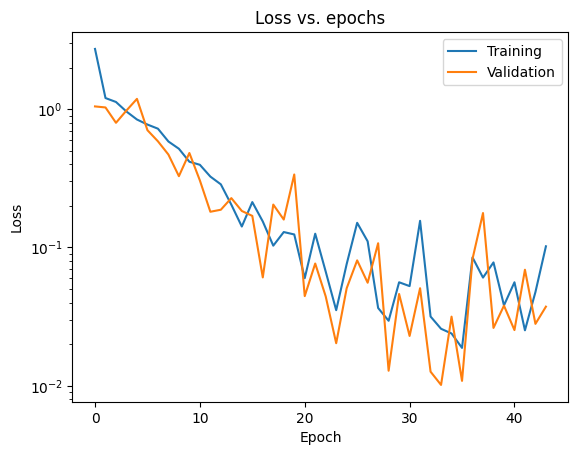

In [158]:
overf_plot(history)

In [92]:
def read_model(url):
  model = get_rnn()
  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

  model_path = '/content/drive/My Drive/SolucionAire/RNN/' + url
  model.load_weights(model_path)
  return model

In [159]:
rnn_model = read_model('RNN.h5')
y_pred_rnn = rnn_model.predict(X_test_tensor, batch_size=4)

42/42 [==============================] - 0s 977us/step


In [160]:
# Calcula el R^2
r2_rnn = r2_score(y_test, y_pred_rnn)


print(f'R^2: {r2_rnn}')

R^2: 0.9991062891659943


In [162]:
X_test_tensor[0]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([96., 25.], dtype=float32)>

## Pruebas combinados

In [167]:
v1 = np.array([[96, 25]])
v1_tensor = tf.convert_to_tensor(v1, dtype=tf.float32)

In [168]:
v2 = np.array([[16.7, 30]])
v2_tensor = tf.convert_to_tensor(v2, dtype=tf.float32)

In [171]:
rfr.predict(v1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6.42723595])

In [172]:
rfr.predict(v2)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.23177587])

In [169]:
xgb_r.predict(v1)

array([6.4589825], dtype=float32)

In [170]:
xgb_r.predict(v2)

array([0.23585983], dtype=float32)

In [173]:
rnn_model.predict(v1_tensor)

1/1 [==============================] - 0s 18ms/step


array([[6.384994]], dtype=float32)

In [174]:
rnn_model.predict(v2_tensor)

1/1 [==============================] - 0s 25ms/step


array([[0.19935721]], dtype=float32)

In [175]:
v1_prom = (rfr.predict(v1) + xgb_r.predict(v1) + rnn_model.predict(v1_tensor))/3
v1_prom

1/1 [==============================] - 0s 28ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[6.42373748]])

In [176]:
v2_prom = (rfr.predict(v2) + xgb_r.predict(v2) + rnn_model.predict(v2_tensor))/3
v2_prom

1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([[0.22233097]])

In [194]:
y_pred_mix = np.mean((y_pred_rfr, y_pred_xgb_r, y_pred_rnn.reshape(-1)), axis = 0)

In [196]:
# Calcula el R^2 Mixed
r2_mixed = r2_score(y_test, y_pred_mix)

print(f'R^2: {r2_mixed}')

R^2: 0.9994030457886606


## Lectura unificada

In [13]:
# Abre el archivo en modo lectura binaria (rb)
with open('/content/drive/My Drive/SolucionAire/Modelos/RFR.pkl', 'rb') as archivo:
    # Carga los datos desde el archivo
    rfr = pickle.load(archivo)

with open('/content/drive/My Drive/SolucionAire/Modelos/xgb.pkl', 'rb') as archivo:
    # Carga los datos desde el archivo
    xgb = pickle.load(archivo)

In [212]:
type(rfr), type(xgb)

(sklearn.ensemble._forest.RandomForestRegressor, xgboost.sklearn.XGBRegressor)

In [214]:
rfr.predict(v1), xgb.predict(v1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(array([6.42723595]), array([6.4589825], dtype=float32))

In [14]:
rfr.predict(X_test)

array([6.42723595e+00, 5.33300723e+00, 2.12884177e+00, 9.76087629e+00,
       9.79032336e+00, 1.25199250e-01, 4.84117616e+00, 1.04998294e+01,
       8.65692310e+00, 3.38605200e+00, 6.75041283e+00, 6.10362875e-01,
       3.73027624e-01, 5.85552943e+00, 3.41933460e+00, 9.06594718e+00,
       3.12944777e+00, 6.21635829e+00, 8.51144953e+00, 2.70914620e-01,
       3.55433091e+00, 6.65355061e+00, 8.39434526e+00, 8.57001498e+00,
       1.96582255e-01, 2.09238819e+00, 3.28538936e-02, 3.70835106e+00,
       1.09598767e+00, 3.58412514e+00, 7.96716761e+00, 5.70024607e+00,
       2.95995005e-01, 5.89985099e+00, 2.51181528e+00, 1.45956111e+00,
       8.27857200e+00, 7.52801816e+00, 1.20088219e+01, 3.58003176e+00,
       1.98353947e+00, 1.87868597e+00, 6.01013515e+00, 2.53666600e+00,
       7.13317791e-01, 1.03047673e+01, 1.55860280e+00, 5.53241910e+00,
       3.96992783e-01, 3.54117748e+00, 3.07566273e+00, 6.34142762e-03,
       6.80628765e+00, 4.68965223e+00, 1.08875206e+00, 2.62942851e+00,
      

In [15]:
X_test

,db,PSI
695,96,25
816,97,10
30,31,150
599,120,50
96,97,150
...,...,...
422,63,75
687,88,25
218,99,125
706,107,25
